In [ ]:
!gdown 16YDUpyD_VloBfesCEqUrrvFEFat9uTk1

Downloading...
From: https://drive.google.com/uc?id=16YDUpyD_VloBfesCEqUrrvFEFat9uTk1
To: /content/dataset_emotion.zip
100% 723k/723k [00:00<00:00, 47.7MB/s]


In [ ]:
import zipfile
zipfile.ZipFile('/content/dataset_emotion.zip').extractall()

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_train = pd.read_csv('/content/dataset_emotion/train.txt', header =None, sep =';', names = ['Input','Sentiment'], encoding='utf-8')
df_test = pd.read_csv('/content/dataset_emotion/test.txt', header = None, sep =';', names = ['Input','Sentiment'],encoding='utf-8')
df_val = pd.read_csv('/content/dataset_emotion/val.txt',header=None,sep=';',names=['Input','Sentiment'],encoding='utf-8')

In [ ]:
df_train.head()

,Input,Sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
df_train.shape, df_test.shape, df_val.shape

((16000, 2), (2000, 2), (2000, 2))

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 10)
import seaborn as sns
sns.set()
%config InlineBackend.figure_format = 'retina'

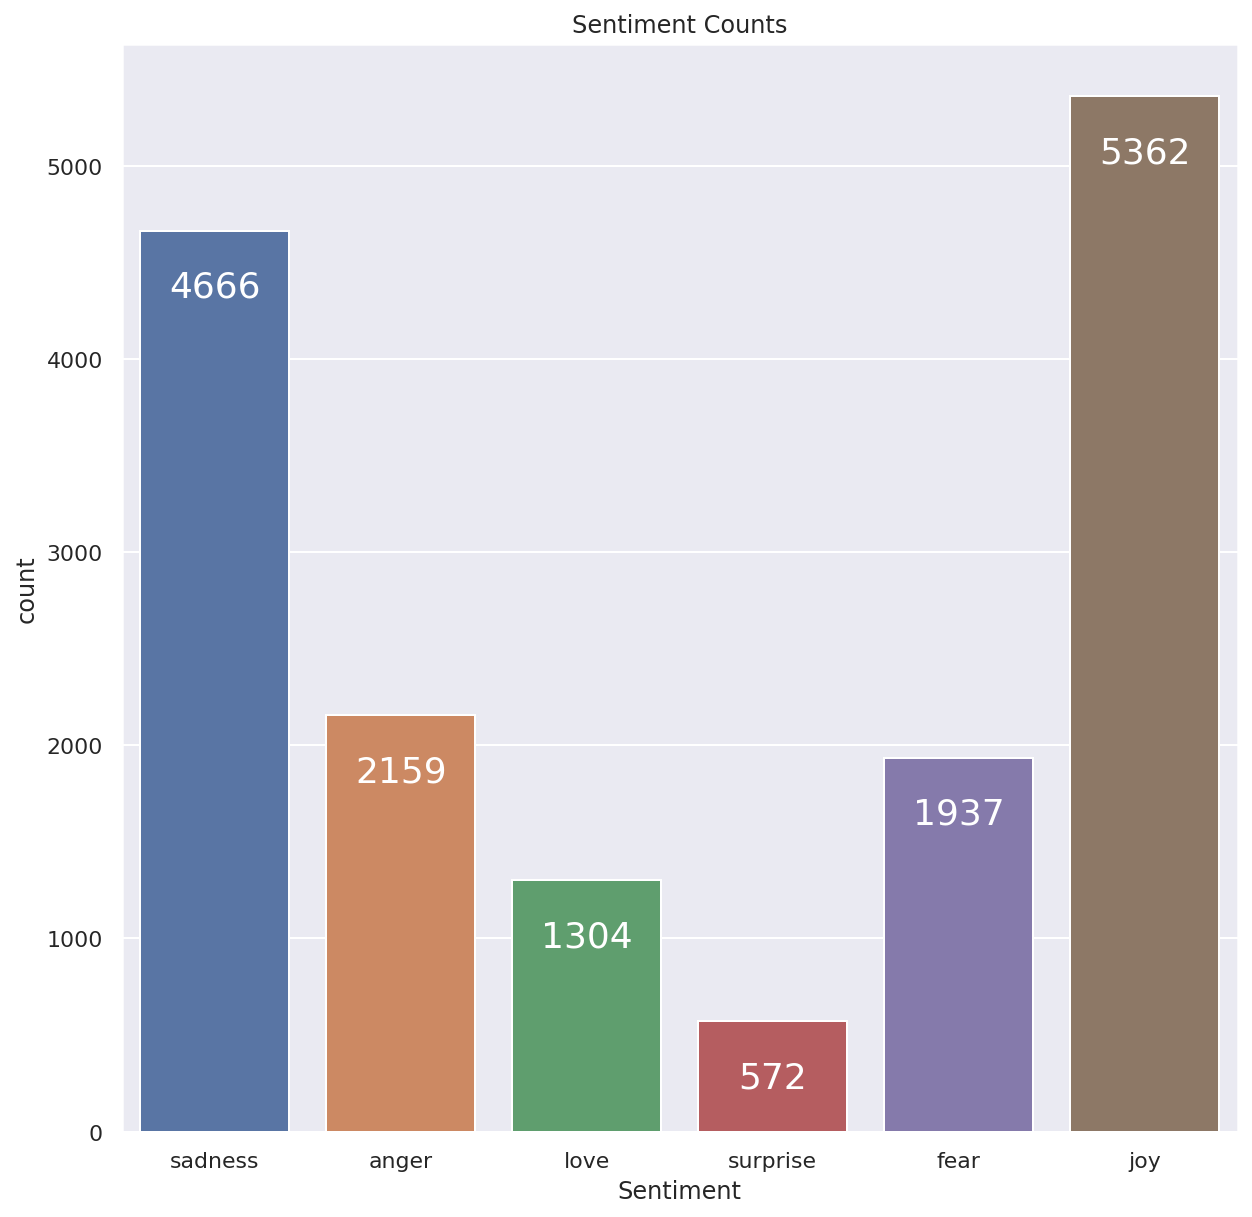

In [ ]:
ax = sns.countplot(x=df_train.Sentiment)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=18)
plt.title('Sentiment Counts')
plt.show()

In [ ]:
%pip install text_hammer -q

     |████████████████████████████████| 115 kB 5.2 MB/s 


In [ ]:
import text_hammer as th

In [ ]:
%%time

from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

def text_preprocessing(df,col_name):
    column = col_name
    df[column] = df[column].progress_apply(lambda x:str(x).lower())
    df[column] = df[column].progress_apply(lambda x: th.cont_exp(x)) #you're -> you are; i'm -> i am
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))
    # df[column] = df[column].progress_apply(lambda x: ps.remove_stopwords(x))  

    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.make_base(x)) #ran -> run,
    return(df)

CPU times: user 2.11 ms, sys: 0 ns, total: 2.11 ms
Wall time: 1.9 ms


In [ ]:
df_cleaned_train = text_preprocessing(df_train, 'Input')

  0%|          | 0/16000 [00:00<?, ?it/s]

  0%|          | 0/16000 [00:00<?, ?it/s]

  0%|          | 0/16000 [00:00<?, ?it/s]

  0%|          | 0/16000 [00:00<?, ?it/s]

  0%|          | 0/16000 [00:00<?, ?it/s]

  0%|          | 0/16000 [00:00<?, ?it/s]

  0%|          | 0/16000 [00:00<?, ?it/s]

In [ ]:
labels = {
    'joy' : 0,
    'anger' : 1,
    'love' : 2,
    'sadness' : 3,
    'fear' : 4,
    'surprise' : 5
    }

In [ ]:
df_cleaned_train['Sentiment']=df_cleaned_train.Sentiment.replace(labels)
df_test['Sentiment']=df_test.Sentiment.replace(labels)
df_val['Sentiment']=df_val.Sentiment.replace(labels)

In [ ]:
cleaned_data = {
    'df_cleaned_train' : df_cleaned_train,
    'df_test' : df_test,
    'df_val' : df_val
}

In [ ]:
import pickle
with open('df_cleaned_train_test_val_.pkl', 'wb') as f:
    pickle.dump(cleaned_data, f)